# Titanic - Machine Learning from Disaster

The goal is to predict if someone survived the Titanic incident based on given features.
> NOTE: Dataset is taken from [here](https://www.kaggle.com/competitions/titanic/overview)

In [132]:
import datetime
print(f"Notebook last run: {datetime.datetime.now()}")

Notebook last run: 2024-08-01 12:45:23.561030


In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [134]:
df = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")

# Combine all dataframe into a single dataframe
df['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN # Make the label for est dataset NaN

all_data = pd.concat([df,test])
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [135]:
df.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [136]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


# EDA (Exploratory Data Analysis)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [138]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [139]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
train_test       0
dtype: int64

# Separate numerical and categorical data

In [140]:
df_num = df[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = df[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

In [141]:
def plot_num_data (columns):
  """
    Plot numerical data
  """
  for column in columns:
    plt.hist(df_num[column], bins='auto')
    plt.title(column)
    plt.show()

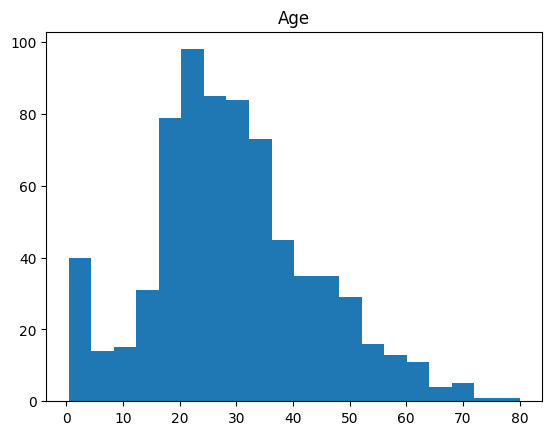

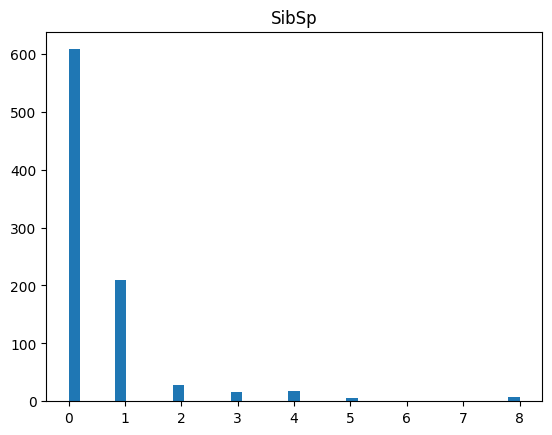

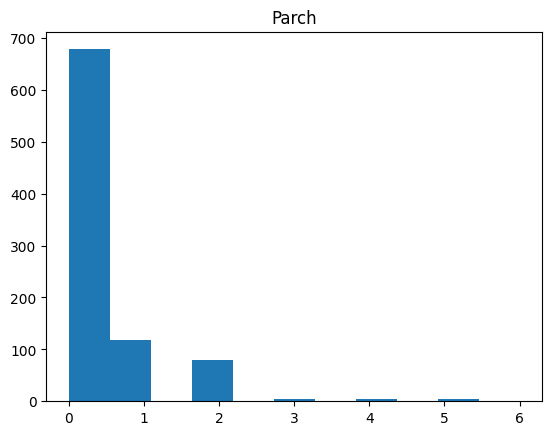

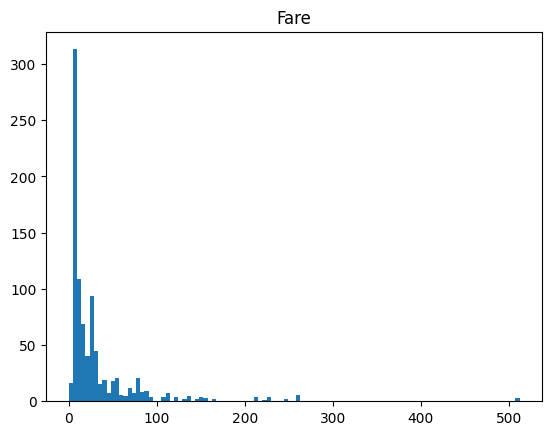

In [142]:
plot_num_data(df_num.columns)

Some features, like fare, are not normally distributed, we have to normalize it later.

Check for correlation

<Axes: >

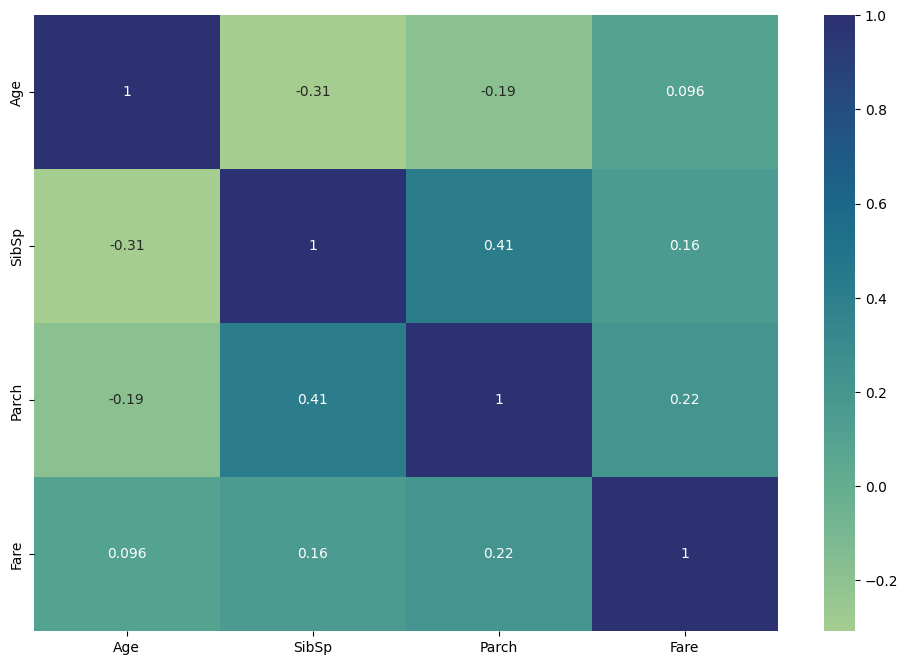

In [143]:
plt.figure(figsize=(12,8))
sns.heatmap(df_num.corr(), cmap='crest', annot= True)

In [144]:
# Check survival rate across all numerical features (avg)
pd.pivot_table(df, index= 'Survived', values =['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


### Insight
Rich and young people have higher survival rate

In [145]:
def plot_cat_data(columns):
  """
    Plot categorical data
  """
  for column in columns:
    plt.figure(figsize=(10, 6))  # Adjust the size of each plot
    sns.barplot(x=df_cat[column].value_counts().index, y=df_cat[column].value_counts()).set_title(column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

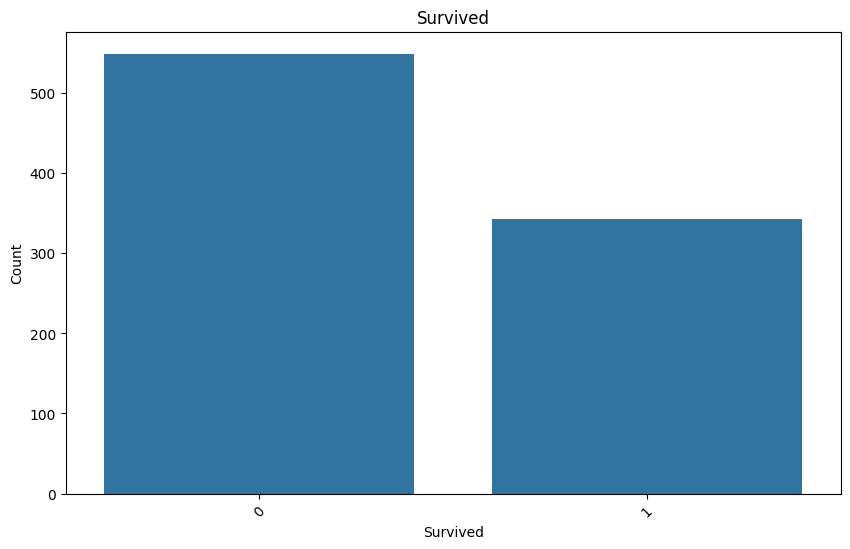

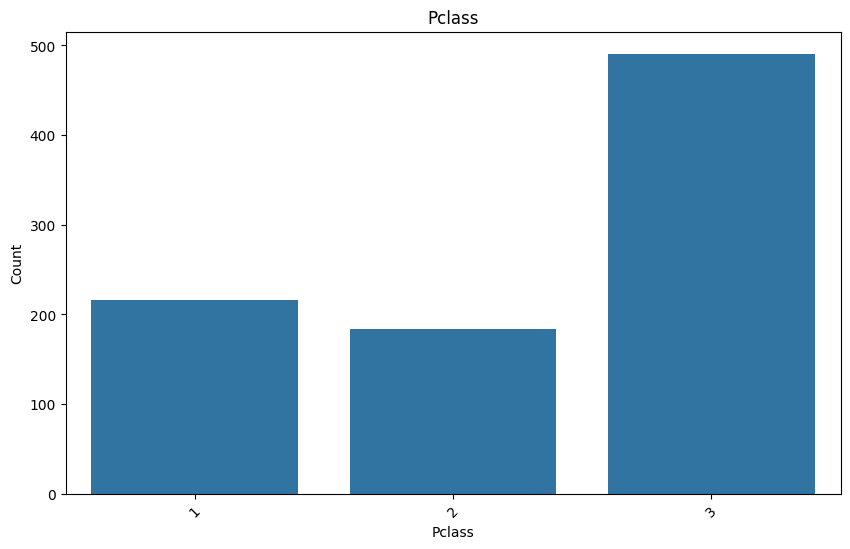

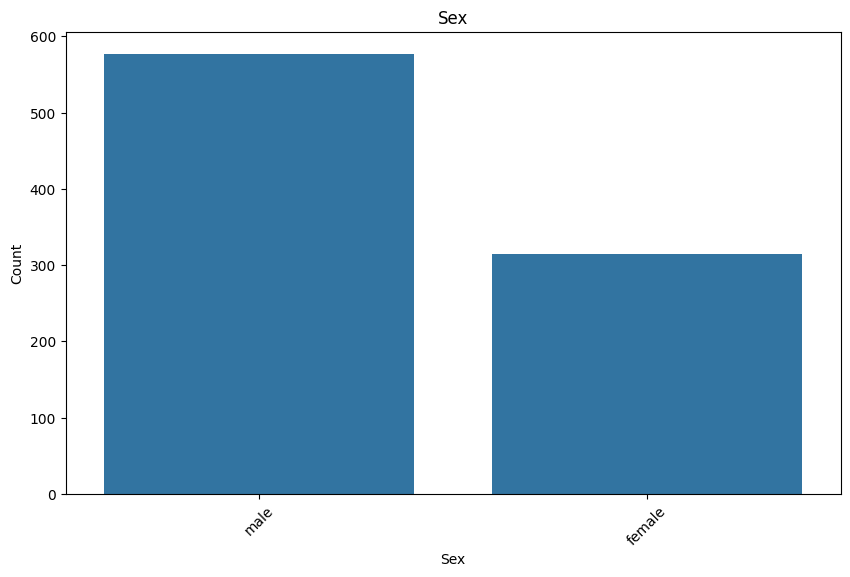

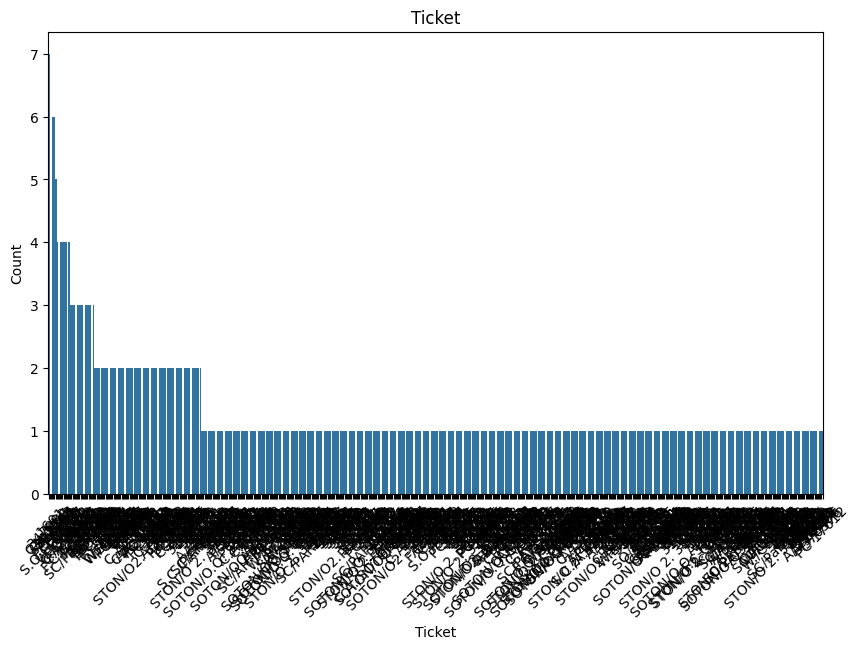

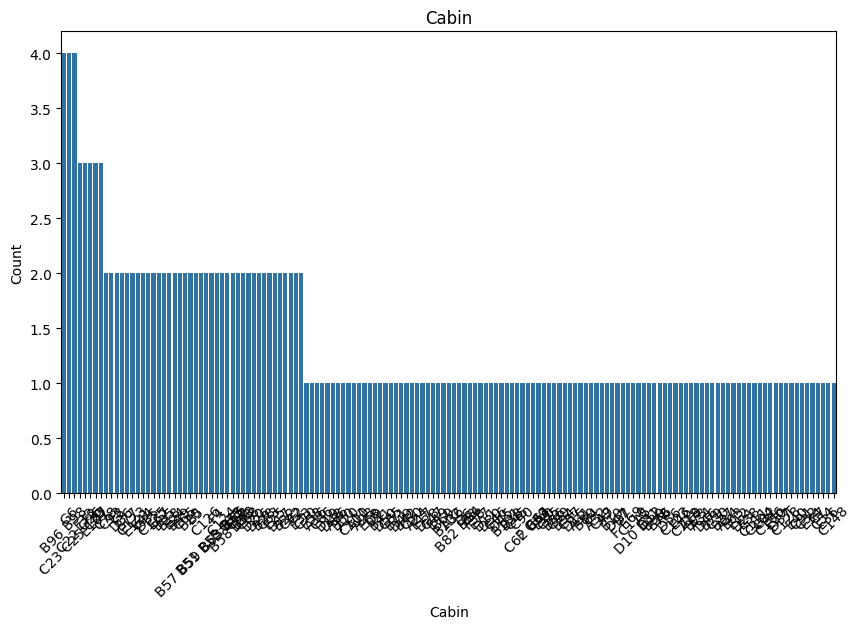

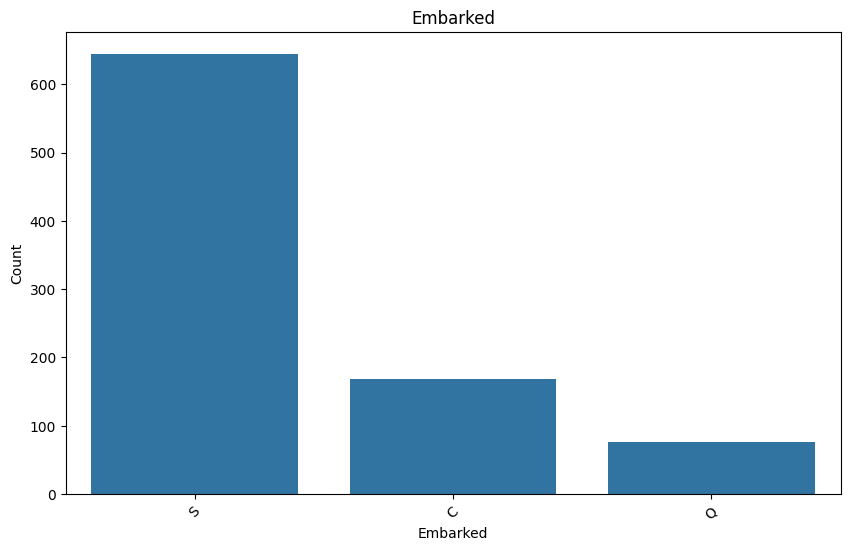

In [146]:
plot_cat_data(df_cat.columns)

In [147]:
print (pd.pivot_table(df, index= 'Survived', columns= 'Pclass', values= 'Ticket', aggfunc= 'count'))
print()
print (pd.pivot_table(df, index= 'Survived', columns= 'Sex', values= 'Ticket', aggfunc= 'count'))
print()
print (pd.pivot_table(df, index= 'Survived', columns= 'Embarked', values= 'Ticket', aggfunc= 'count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


### Insight

Pclass 1 has higher survival than Pclass 1 and 3. Female also has higher survival rate than male. Embarked on S has higher survival rate than C and Q.

# Feature Engineering

## 1. Simplify cabins

  Change the cabin feature into something useful.

In [148]:
# Make a new feature which contains the number of cabin that a passenger has.
df['cabin_multiple'] = df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' '))) # Create a new feature that tells how many cabin a passenger has
df['cabin_multiple'].value_counts()

cabin_multiple
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

In [149]:
pd.pivot_table(df, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [150]:
# Create categories based on the first cabin letter (n stands for null)
# We will treat null values like it's own category

df['cabin_adv'] = df.Cabin.apply(lambda x: str(x)[0]) # Convert the X to string and take the first letter

In [151]:
print(df.cabin_adv.value_counts())
pd.pivot_table(df,index='Survived',columns='cabin_adv', values = 'Name', aggfunc='count')

cabin_adv
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [152]:
df['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

### Insight
Since there are tickets which contain only numerical value and numerical + letters, we have to make another category for tickets.

In [153]:
# Combine the letters together and lowercase it, remove the numerical value after the letters since we dont need it.

df['numerical_tickets'] = df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
df['letter_ticket'] = df.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

df['letter_ticket'].value_counts()

letter_ticket
0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: count, dtype: int64

In [154]:
pd.pivot_table(df,index='Survived',columns='numerical_tickets', values = 'Ticket', aggfunc='count')

numerical_tickets,0,1
Survived,,
0,142,407
1,88,254


In [155]:
pd.pivot_table(df,index='Survived',columns='letter_ticket', values = 'Ticket', aggfunc='count')

letter_ticket,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [156]:
df.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

Make a new feature to store title for each passesnger's name

In [157]:
df['name_title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip()) # Take the second (after ,), then take the first element of the array which is the title of the passenger. Strip to delete unnecessary space.

In [158]:
df['name_title'].value_counts()

name_title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

#  Data preprocessing for model

1. Drop null values from Embarked (only 2).

2. Include only relevant features.
    
  Features: 'Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'cabin_adv', 'cabin_multiple', 'numeric_ticket', 'name_title'.

3. Do categorical transforms on all data. Usually we would use a transformer, but with this approach we can ensure that our traning and test data have the same colums. We also may be able to infer something about the shape of the test data through this method.

4. Impute data with median for fare and age (mean is also worth to try).

5. Normalized fare using logarithm to give more semblance of a normal distribution.

6. Scaled data 0-1 with standard scaler.

In [159]:
# Create all categorical variables that we did above for both training and test sets

all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Drop null 'embarked' rows. Only 2 instances of this in training and 0 in test
all_data.dropna(subset=['Embarked'],inplace = True)

# Impute null values in some feature
all_data.Age = all_data.Age.fillna(df.Age.median())
all_data.Fare = all_data.Fare.fillna(df.Fare.median())

# log norm of fare to make it normally distributed
all_data['norm_fare'] = np.log(all_data.Fare+1)

# Convert fare to category for pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)

# Create dummy variables from categories (also can use OneHotEncoder), dummy here to convert all categorical values to numerical data by creating new column that contains either 0 or 1 based on the categories
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])

# Split to train test again, 1 for training and 0 for testing, after we split the data, drop the train_test since we dont need it anymore
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)


y_train = all_data[all_data.train_test==1].Survived
y_train.shape



(889,)

In [160]:
y_train

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 889, dtype: float64

In [161]:
# Scale data
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived

# Modelling

In [162]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [163]:
# Naive Bayes
gnb = GaussianNB()
cv = cross_val_score(gnb, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.66853933 0.70224719 0.76966292 0.75842697 0.72881356]
0.7255379927632831


In [164]:
# Logistic Regression
lr = LogisticRegression(max_iter = 5000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.80898876 0.80337079 0.82022472 0.85310734]
0.8223068621849807


In [165]:
# Decision Tree
dt = DecisionTreeClassifier(random_state = 42)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.74719101 0.7752809  0.84831461 0.74157303 0.8079096 ]
0.7840538310163143


In [166]:
# K-Neighbors
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.76966292 0.79775281 0.80898876 0.82022472 0.85310734]
0.8099473116231829


In [167]:
# Random Forest
rf = RandomForestClassifier(random_state = 42)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80337079 0.78651685 0.85955056 0.74157303 0.83050847]
0.8043039421062655


In [168]:
# Support Vector Classifier
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.85393258 0.82022472 0.8258427  0.80337079 0.86440678]
0.8335555132355742


In [169]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 42)
cv = cross_val_score(xgb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80337079 0.80898876 0.85393258 0.78651685 0.80225989]
0.8110137751539389


In [170]:
# Voting classifier takes all of the inputs and averages the results. For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" and the result is label that has the most vote.
# A "soft" classifier averages the confidence of each of the models. If a the average confidence is > 50% that it is a 1 it will be counted as such
from sklearn.ensemble import VotingClassifier
voting_classifier = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft')

In [171]:
cv = cross_val_score(voting_classifier,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.81460674 0.83707865 0.79775281 0.84745763]
0.8245477051990097


In [172]:
voting_classifier.fit(X_train_scaled,y_train)
y_pred = voting_classifier.predict(X_test_scaled).astype(int)
basic_submission = {'PassengerId': test.PassengerId, 'Survived': y_pred}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('base_submission.csv', index=False)

# Model Tuned Performance

In [173]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# NOTE: Due to computation limitation, some model will use RandomizedSearchCV for this project.

In [174]:
def clf_performance(classifier, model_name):
  """
    Return model's performance
  """
  print(model_name)
  print('Best Score: ' + str(classifier.best_score_))
  print('Best Parameters: ' + str(classifier.best_params_))

In [175]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scaled,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.8279375357074843
Best Parameters: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [176]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_scaled,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.8290611312131023
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


In [178]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = RandomizedSearchCV(svc, param_distributions = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
SVC
Best Score: 0.8279375357074843
Best Parameters: {'kernel': 'poly', 'degree': 3, 'C': 0.1}


In [180]:
rf = RandomForestClassifier(random_state = 42)
param_grid = {
    'n_estimators': [400, 450, 500, 550],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True],
    'max_depth': [15, 20, 25],
    'max_features': ['sqrt', 'log2', 10],  
    'min_samples_leaf': [2, 3],
    'min_samples_split': [2, 3]
}

clf_rf = RandomizedSearchCV(rf, param_distributions = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Random Forest
Best Score: 0.8335555132355742
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 10, 'max_depth': 15, 'criterion': 'entropy', 'bootstrap': True}


<Axes: >

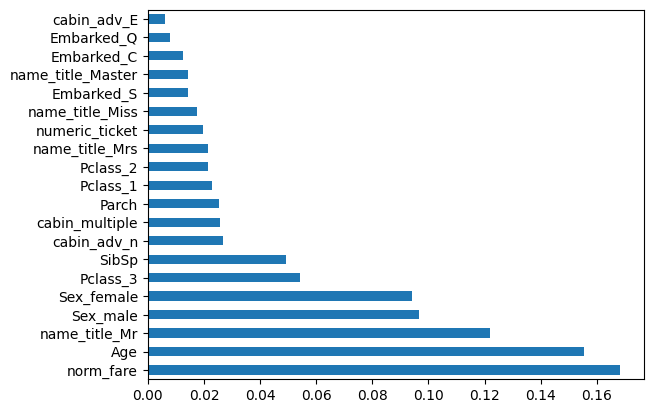

In [181]:
# Use random forest since it has the highest score, plot the feature importance of each feature
best_rf = best_clf_rf.best_estimator_.fit(X_train_scaled,y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [182]:
# Check for XGBoost

xgb = XGBClassifier(random_state = 42)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = RandomizedSearchCV(xgb, param_distributions = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)
clf_performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


XGB
Best Score: 0.8380308512664254
Best Parameters: {'subsample': 0.65, 'sampling_method': 'uniform', 'reg_lambda': 5, 'reg_alpha': 1, 'n_estimators': 550, 'min_child_weight': 0.01, 'max_depth': None, 'learning_rate': 0.5, 'gamma': 1, 'colsample_bytree': 0.75}


In [183]:
y_pred = best_clf_xgb.best_estimator_.predict(X_test_scaled).astype(int)
xgb_submission = {'PassengerId': test.PassengerId, 'Survived': y_pred}
submission_xgb = pd.DataFrame(data=xgb_submission)
submission_xgb.to_csv('xgb_submission3.csv', index=False)

In [184]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

voting_clf_hard = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'hard')
voting_clf_soft = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'soft')
voting_clf_lr = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('lr', best_lr)], voting = 'soft')
voting_clf_all = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('xgb', best_xgb),('lr', best_lr)], voting = 'soft')

print('voting_clf_hard :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5))
print('voting_clf_hard mean :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5).mean())

print('voting_clf_soft :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5))
print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5).mean())

print('voting_clf_lr :',cross_val_score(voting_clf_lr,X_train,y_train,cv=5))
print('voting_clf_lr mean :',cross_val_score(voting_clf_lr,X_train,y_train,cv=5).mean())

print('voting_clf_all :',cross_val_score(voting_clf_all,X_train,y_train,cv=5))
print('voting_clf_all mean :',cross_val_score(voting_clf_all,X_train,y_train,cv=5).mean())

voting_clf_hard : [0.79775281 0.80337079 0.84269663 0.78089888 0.84180791]
voting_clf_hard mean : 0.813305402145623
voting_clf_soft : [0.78089888 0.79775281 0.85955056 0.78651685 0.85310734]
voting_clf_soft mean : 0.8133180981400369
voting_clf_lr : [0.80898876 0.81460674 0.84269663 0.79775281 0.86440678]
voting_clf_lr mean : 0.8279438837046911
voting_clf_all : [0.82022472 0.8258427  0.85393258 0.82022472 0.8700565 ]
voting_clf_all mean : 0.838056243255253


In [185]:
params = {'weights' : [[1,1,1],[1,2,1],[1,1,2],[2,1,1],[2,2,1],[1,2,2],[2,1,2]]}

vote_weight = RandomizedSearchCV(voting_clf_soft, param_distributions = params, cv = 5, verbose = True, n_jobs = -1)
best_clf_weight = vote_weight.fit(X_train_scaled,y_train)
clf_performance(best_clf_weight,'VC Weights')
voting_clf_sub = best_clf_weight.best_estimator_.predict(X_test_scaled)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


VC Weights
Best Score: 0.833561861232781
Best Parameters: {'weights': [1, 2, 2]}


In [186]:
# Make Predictions
voting_clf_hard.fit(X_train_scaled, y_train)
voting_clf_soft.fit(X_train_scaled, y_train)
voting_clf_lr.fit(X_train_scaled, y_train)
voting_clf_all.fit(X_train_scaled, y_train)

best_rf.fit(X_train_scaled, y_train)
y_pred_vc_hard = voting_clf_hard.predict(X_test_scaled).astype(int)
y_pred_rf = best_rf.predict(X_test_scaled).astype(int)
y_pred_vc_soft =  voting_clf_soft.predict(X_test_scaled).astype(int)
y_pred_lr = voting_clf_lr.predict(X_test_scaled).astype(int)
y_pred_all = voting_clf_all.predict(X_test_scaled).astype(int)

In [187]:
# Convert output to dataframe
final_data = {'PassengerId': test.PassengerId, 'Survived': y_pred_rf}
submission = pd.DataFrame(data=final_data)

final_data_2 = {'PassengerId': test.PassengerId, 'Survived': y_pred_vc_hard}
submission_2 = pd.DataFrame(data=final_data_2)

final_data_3 = {'PassengerId': test.PassengerId, 'Survived': y_pred_vc_soft}
submission_3 = pd.DataFrame(data=final_data_3)

final_data_4 = {'PassengerId': test.PassengerId, 'Survived': y_pred_lr}
submission_4 = pd.DataFrame(data=final_data_4)

final_data_5 = {'PassengerId': test.PassengerId, 'Survived': y_pred_all}
submission_5 = pd.DataFrame(data=final_data_5)

final_data_comp = {'PassengerId': test.PassengerId, 'Survived_vc_hard': y_pred_vc_hard, 'Survived_rf': y_pred_rf, 'Survived_vc_soft' : y_pred_vc_soft, 'Survived_vc_lr' : y_pred_lr,  'Survived_vc_all' : y_pred_all}
comparison = pd.DataFrame(data=final_data_comp)

In [188]:
submission.to_csv('submission_rf.csv', index =False)
submission_2.to_csv('submission_vc_hard.csv',index=False)
submission_3.to_csv('submission_vc_soft.csv', index=False)
submission_4.to_csv('submission_vc_lr.csv', index=False)
submission_5.to_csv('submission_vc_all.csv', index=False)